## Python version

In [1]:
from platform import python_version
print(python_version())

3.6.9


## Import Libraries

In [2]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

# https://www.kdnuggets.com/2018/02/google-colab-free-gpu-tutorial-tensorflow-keras-pytorch.html/2
# https://pypi.org/project/pyramid-arima/
!pip install -q pyramid-arima==0.9.0

from numpy.random import seed
seed(1)
from pandas import DataFrame
from pyramid.arima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


/home/michael/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/michael/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/michael/.local/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is du

## Data Import and Manipulation

In [3]:
train_df = pd.read_csv('H1full.csv', dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [4]:
df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
40055,2017,35
40056,2017,35
40057,2017,35
40058,2017,35


In [5]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
40055    201735
40056    201735
40057    201735
40058    201735
40059    201735
Length: 40060, dtype: object


In [6]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
40055,0.0
40056,0.0
40057,0.0
40058,0.0


In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'IsCanceled']

In [9]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
0,201527,0.0
1,201527,0.0
2,201527,0.0
3,201527,0.0
4,201527,0.0
...,...,...
13799,201735,1.0
13800,201735,1.0
13801,201735,1.0
13802,201735,1.0


In [10]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201731,173.0
201732,140.0
201733,182.0


In [11]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     41.0
201528     48.0
201529     87.0
201530     74.0
201531    101.0
          ...  
201731    173.0
201732    140.0
201733    182.0
201734    143.0
201735    100.0
Name: IsCanceled, Length: 115, dtype: float64

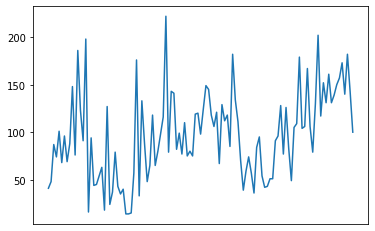

In [12]:
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [13]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201731,173.0
201732,140.0
201733,182.0


## Train-Test Split

In [14]:
tseriesr=pd.Series(tseries)
type(tseriesr)

# logvalue=np.log(tseriesr)
train, val = tseriesr[1:80], tseriesr[81:100]

In [15]:
type(val)

pandas.core.series.Series

In [16]:
train

FullDate
201528     48.0
201529     87.0
201530     74.0
201531    101.0
201532     68.0
          ...  
201649     74.0
201650     57.0
201651     36.0
201652     84.0
201653     95.0
Name: IsCanceled, Length: 79, dtype: float64

In [17]:
val

FullDate
201702     42.0
201703     43.0
201704     51.0
201705     51.0
201706     91.0
201707     96.0
201708    128.0
201709     77.0
201710    126.0
201711     83.0
201712     49.0
201713    105.0
201714    109.0
201715    179.0
201716    104.0
201717    106.0
201718    167.0
201719    106.0
201720     79.0
Name: IsCanceled, dtype: float64

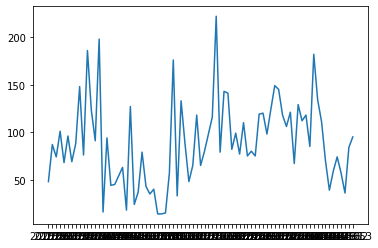

In [18]:
plt.plot(train)
plt.show()

### Autocorrelation Plot

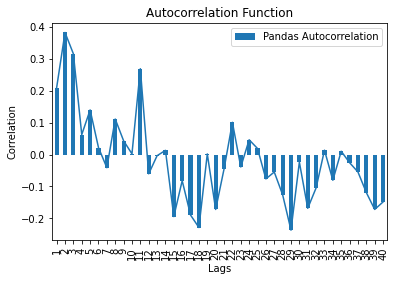

In [19]:
acf_1 =  acf(train)[1:50]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.plot(acf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Autocorrelation Function')
plt.show()

In [20]:
acf_1

array([ 0.20931733,  0.38197312,  0.31530534,  0.0622506 ,  0.1396059 ,
        0.02172799, -0.04126991,  0.11103553,  0.04299311,  0.00205462,
        0.26860433, -0.06040052, -0.00380789,  0.0130726 , -0.19428628,
       -0.08193784, -0.18951941, -0.22849462,  0.00183862, -0.17196409,
       -0.04549428,  0.10074914, -0.03905616,  0.04614769,  0.0188279 ,
       -0.07631446, -0.05476133, -0.1257952 , -0.23682021, -0.0239377 ,
       -0.16840741, -0.10447924,  0.01352176, -0.08054517,  0.01015105,
       -0.02548999, -0.05462688, -0.11893659, -0.17193458, -0.14839724])

### Partial Autocorrelation Plot

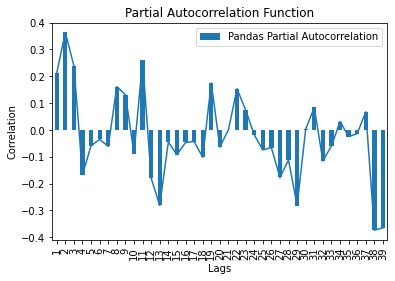

In [21]:
pacf_1 =  pacf(train)[1:40]
val_df = pd.DataFrame([pacf_1]).T
val_df.columns = ['Pandas Partial Autocorrelation']
val_df.index += 1
val_df.plot(kind='bar')
plt.plot(pacf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Partial Autocorrelation Function')
plt.show()

In [22]:
pacf_1

array([ 0.21200088,  0.3632774 ,  0.23863976, -0.1670388 , -0.05874284,
       -0.03546263, -0.06135962,  0.1612243 ,  0.1311    , -0.08807084,
        0.25891308, -0.18031084, -0.2814698 , -0.04519587, -0.09229597,
       -0.04686845, -0.04336517, -0.10180477,  0.17450237, -0.06355372,
        0.00043641,  0.15359563,  0.07481384, -0.01768203, -0.07443292,
       -0.06589568, -0.17733184, -0.11195016, -0.28249504,  0.00292817,
        0.08378081, -0.11551819, -0.06006309,  0.03118785, -0.02486253,
       -0.0138124 ,  0.06748982, -0.37381605, -0.3650742 ])

### Dickey-Fuller Test

In [23]:
result = ts.adfuller(train)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.677149
p-value: 0.078077
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587


## ARIMA Model Configuration

In [24]:
Arima_model=auto_arima(train, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=52, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=305.146, BIC=307.662, Fit time=0.143 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/home/michael/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michael/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michael/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michael/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) sea

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=292.219, BIC=295.993, Fit time=0.538 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=293.486, BIC=298.518, Fit time=0.591 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=294.780, BIC=301.070, Fit time=1.398 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/home/michael/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michael/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=293.144, BIC=298.176, Fit time=1.037 seconds
Total fit time: 3.722 seconds


In [25]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   79
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 52)   Log Likelihood                -143.109
Date:                            Wed, 29 Jul 2020   AIC                            292.219
Time:                                    16:06:31   BIC                            295.993
Sample:                                         0   HQIC                           293.306
                                             - 79                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4681     12.198      0.202      0.840     -21.440      26.377
ar.L1         -0.6512      0.170     -3.829      0.000      -0.985      -0.318
sigma2      3462.5542   1487.712      2.327      0.020     546.692    6378.417
===================================================================================
Ljung-Box (Q):                       19.82   Jarque-Bera (JB):                 1.28
Prob(Q):                              0.76   Prob(JB):                         0.53
Heteroskedasticity (H):               2.36   Skew:                            -0.02
Prob(H) (two-sided):                  0.22   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=19), index=val.index)
prediction.columns = ['Predicted_Cancellations']
predictions=prediction['Predicted_Cancellations']

/home/michael/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:293: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
/home/michael/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:293: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
/home/michael/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:294: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
/home/michael/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:296: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._ste

In [27]:
prediction

,Predicted_Cancellations
FullDate,
201702,90.096059
201703,73.013261
201704,69.674852
201705,75.316830
201706,116.762285
201707,238.591517
201708,96.217362
201709,198.277969
201710,154.404314


In [28]:
val

FullDate
201702     42.0
201703     43.0
201704     51.0
201705     51.0
201706     91.0
201707     96.0
201708    128.0
201709     77.0
201710    126.0
201711     83.0
201712     49.0
201713    105.0
201714    109.0
201715    179.0
201716    104.0
201717    106.0
201718    167.0
201719    106.0
201720     79.0
Name: IsCanceled, dtype: float64

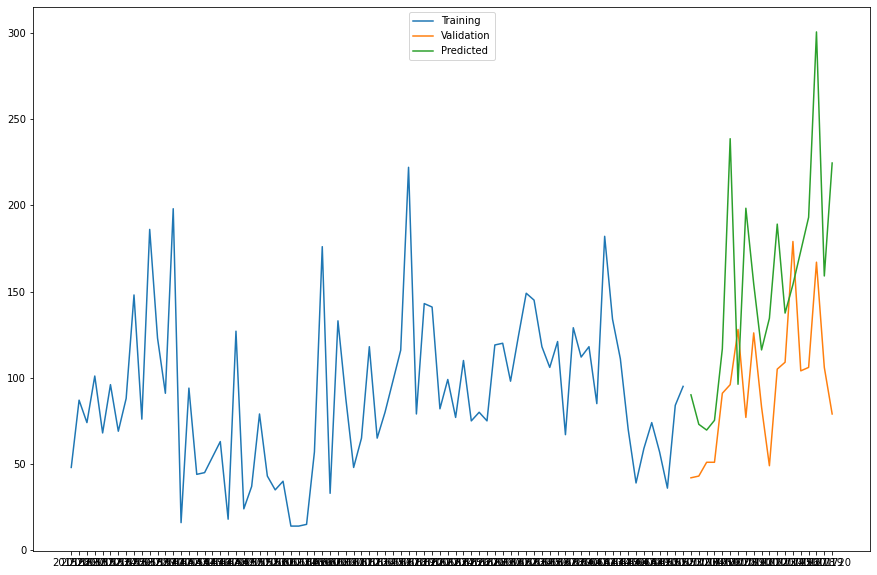

In [29]:
plt.figure(figsize=(15,10))
plt.plot(train, label='Training')
plt.plot(val, label='Validation')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper center')
plt.show()

In [30]:
def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [31]:
type(predictions)

pandas.core.series.Series

In [32]:
mda(val, predictions)

0.8947368421052632

In [33]:
mse = mean_squared_error(val, predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 77.047248


## Validate Predictions on Test Data

In [34]:
test = np.array([[130,202,117,152,131,161,131,139,150,157,173,140,182,143,100]])
test.shape

(1, 15)

In [35]:
test=test.reshape(-1)
test

array([130, 202, 117, 152, 131, 161, 131, 139, 150, 157, 173, 140, 182,
       143, 100])

In [36]:
test.shape

(15,)

In [37]:
test = pd.Series(test)

In [38]:
predictionnew=pd.DataFrame(Arima_model.predict(n_periods=15), index=test.index)
predictionnew.columns = ['Unseen_Predicted_Cancellations']
predictionsnew=predictionnew['Unseen_Predicted_Cancellations']

/home/michael/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:293: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
/home/michael/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:293: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
/home/michael/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:294: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
/home/michael/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:296: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._ste

In [39]:
mse_new = mean_squared_error(test, predictionsnew)
rmse_new = math.sqrt(mse_new)
print('RMSE: %f' % rmse_new)

RMSE: 57.955865


In [40]:
mda(test, predictionsnew)

0.8666666666666667

In [41]:
forecast_error_new = (predictionsnew-test)
forecast_error_new

0     -39.903941
1    -128.986739
2     -47.325148
3     -76.683170
4     -14.237715
5      77.591517
6     -34.782638
7      59.277969
8       4.404314
9     -40.860985
10    -38.522423
11     49.074090
12    -44.497365
13     11.040555
14     73.507254
dtype: float64

In [42]:
mean_forecast_error_new = np.mean(forecast_error_new)
mean_forecast_error_new

-12.726961700749301

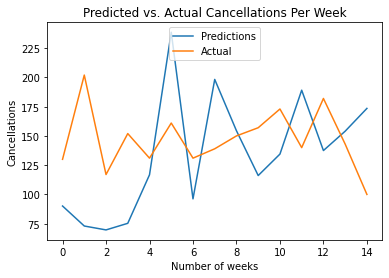

In [43]:
predictons, =plt.plot(predictionsnew, label='Predictions')
actual, =plt.plot(test, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.legend(loc = 'upper center')
plt.show()